# OpenCV Primer

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from tqdm import tqdm
import cv2
import os
import sys

In [2]:
cwd = os.getcwd()
cat_folder = cwd + '\\train\\cat\\'
dog_folder = cwd + '\\train\\dog\\'

## 1. 读取图片: `cv2.imread` 

- OpenCV读取的图片的颜色通道排列顺序默认是 BGR，而matplotlib则是 RGB

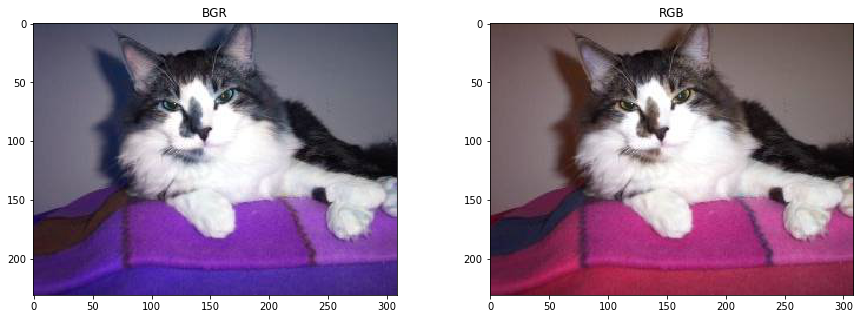

In [69]:
# 色彩通道顺序变换
random_img = np.random.choice(range(12500))
path = cat_folder + str(random_img) + '.jpg'
img = cv2.imread(path)

# 方法1：先分离后合并颜色通道
b,g,r = cv2.split(img)
img_2 = cv2.merge([r,g,b])

# 方法2：使用cvtColor对颜色通道进行转换
img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)     

# 方法3：使用Index Slicing的语法
img_2 = img[:, :, ::-1]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('BGR')
plt.subplot(122)
plt.imshow(img_2, cmap='gray')
plt.title('RGB')
plt.show()

## 2. 访问图片的基本属性：体积、尺寸、元素类型

In [70]:
# 像素点个数
img.size

214137

In [71]:
# 高度 x 宽度 x 颜色通道数
img.shape

(231, 309, 3)

In [72]:
# 每个像素点元素的数据类型：1Byte
img.dtype

dtype('uint8')

In [80]:
# 图像矩阵变量的内存占用，单位为Byte
sys.getsizeof(img)

214265

In [81]:
# 由于img本身是np.array，因此除了元素数据外，还封装有其他一些属性信息，这些信息的内存占用为128Byte
sys.getsizeof(img) - img.size

128

In [73]:
print("File Size:", os.path.getsize(path), 'Byte')
print("Array Size:", img.size, 'Byte')
print("JPEG Compress Ratio:", np.round(os.path.getsize(path) / img.size * 100, 2), '%')

File Size: 8909 Byte
Array Size: 214137 Byte
JPEG Compress Ratio: 4.16 %


### 注意绘图的横坐标是第二个维度，纵坐标才是第一个维度

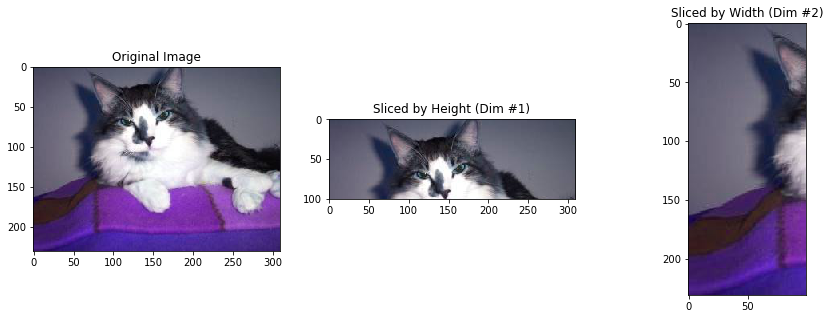

In [79]:
# 第一维度是图片的高度
height_slice = img[:100, :]
# 第二维度是图片的宽度
width_slice = img[:, :100]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(132)
plt.imshow(height_slice, cmap='gray')
plt.title("Sliced by Height (Dim #1)")
plt.subplot(133)
plt.imshow(width_slice, cmap='gray')
plt.title("Sliced by Width (Dim #2)")
plt.show()

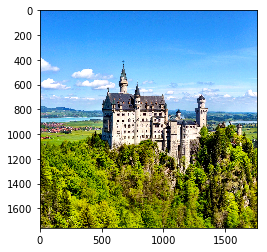

NameError: name 'path' is not defined

In [3]:
img = cv2.imread('view.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)
plt.show()
print("File Size:", os.path.getsize(path), 'Byte')
print("Array Size:", sys.getsizeof(img), 'Byte')
print("JPG Compress Ratio:", np.round(os.path.getsize(path) / sys.getsizeof(img) * 100, 2), '%')

可以看到，对于不同的图片压缩格式和图片内容，其压缩率很不一样。对于这种验证码的图片，由于本身就没什么信息，复杂度较低，因此压缩前后体积变化不大。而对于生活中的物体的图片，由于图片所含的细节很多，因此压缩率可以很高。

## 3. 图像变换

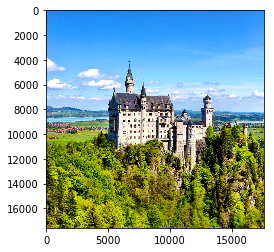

Array Size: 927169200 Bytes
JPG File Size: 36742914 Bytes
PNG File Size: 230686749 Bytes


In [4]:
# 等比例放大100倍，图像体积其实已经增大到200M，但是经过JPG压缩后体积能够缩小至2M，经过无损压缩的PNG图片则需要14M左右。
s = img.shape[0]
img_resize = cv2.resize(img, (s*10, s*10))
plt.imshow(img_resize)
plt.show()
print("Array Size:", img_resize.nbytes, 'Bytes')
b,g,r = cv2.split(img_resize)
img_resize = cv2.merge([r,g,b])
cv2.imwrite('test.jpg', img_resize)
cv2.imwrite('test.png', img_resize)
print("JPG File Size:", os.path.getsize('test.jpg'), 'Bytes')
print("PNG File Size:", os.path.getsize('test.png'), 'Bytes')

### 手写一个棋盘状图片矩阵，然后使用resize看效果

- `cv2.resize` 函数实际上计算的是目的图片到原图片的映射关系（interpolation）。

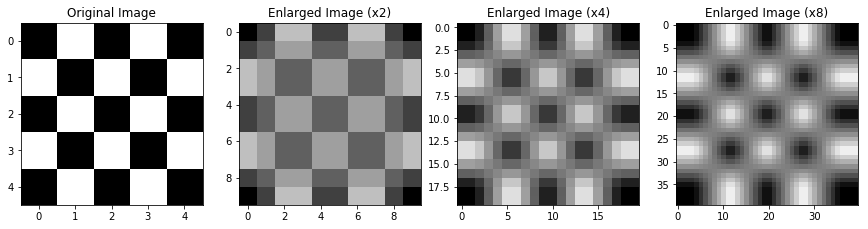

In [55]:
# 放大棋盘
checkerboard = [[0, 255, 0, 255, 0], 
                [255, 0, 255, 0, 255], 
                [0, 255, 0, 255, 0], 
                [255, 0, 255, 0, 255], 
                [0, 255, 0, 255, 0]]
mat = np.array(checkerboard, dtype = np.uint8)
mat = cv2.merge([mat, mat, mat])
mat_resize_x2 = cv2.resize(mat, (10, 10))
mat_resize_x4 = cv2.resize(mat, (20, 20))
mat_resize_x8 = cv2.resize(mat, (40, 40))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x2)
plt.title("Enlarged Image (x2)")
plt.subplot(143)
plt.imshow(mat_resize_x4)
plt.title("Enlarged Image (x4)")
plt.subplot(144)
plt.imshow(mat_resize_x8)
plt.title("Enlarged Image (x8)")
plt.show()

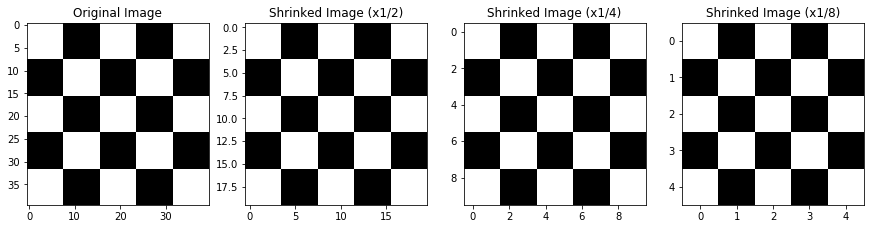

In [58]:
# 缩小棋盘（没有影响）
black = 255 * np.ones((8, 8), dtype=np.uint8)
white = np.zeros((8, 8), dtype=np.uint8)
pattern1 = np.concatenate((black, white, black, white, black), axis=0)
pattern2 = np.concatenate((white, black, white, black, white), axis=0)
mat = np.concatenate((pattern1, pattern2, pattern1, pattern2, pattern1), axis=1)
mat = cv2.merge([mat, mat, mat])
mat_resize_x1_2 = cv2.resize(mat, (20, 20))
mat_resize_x1_4 = cv2.resize(mat, (10, 10))
mat_resize_x1_8 = cv2.resize(mat, (5, 5))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x1_2)
plt.title("Shrinked Image (x1/2)")
plt.subplot(143)
plt.imshow(mat_resize_x1_4)
plt.title("Shrinked Image (x1/4)")
plt.subplot(144)
plt.imshow(mat_resize_x1_8)
plt.title("Shrinked Image (x1/8)")
plt.show()

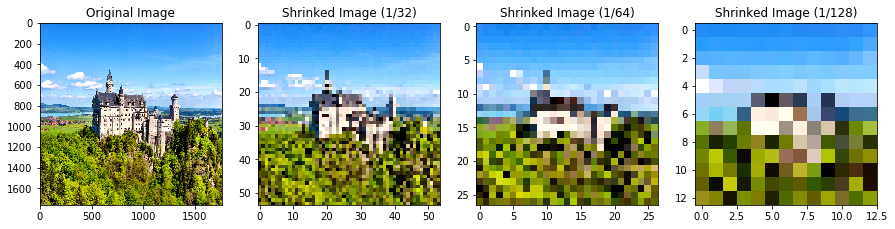

In [73]:
# 缩小风景图片：影响很明显
mat = cv2.imread('view.jpg')
s = mat.shape[0]
b,g,r = cv2.split(mat)
mat = cv2.merge([r,g,b])
mat_resize_x1_2 = cv2.resize(mat, (s//32, s//32))
mat_resize_x1_4 = cv2.resize(mat, (s//64, s//64))
mat_resize_x1_8 = cv2.resize(mat, (s//128, s//128))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x1_2)
plt.title("Shrinked Image (1/32)")
plt.subplot(143)
plt.imshow(mat_resize_x1_4)
plt.title("Shrinked Image (1/64)")
plt.subplot(144)
plt.imshow(mat_resize_x1_8)
plt.title("Shrinked Image (1/128)")
plt.show()

## 4. 绘图

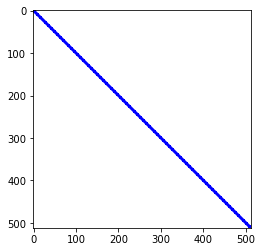

In [4]:
# Blank Canvas
# 0 = Black, 1 = White
img = 255 * np.ones((512, 512, 3), dtype=np.uint8)

# Draw lines
start = (0, 0)
end = (511, 511)
color = (255, 0, 0)
img = cv2.line(img, start, end, color, thickness=5, lineType=cv2.LINE_AA)
img = img[:, :, ::-1]
plt.imshow(img, cmap='gray')
plt.show()

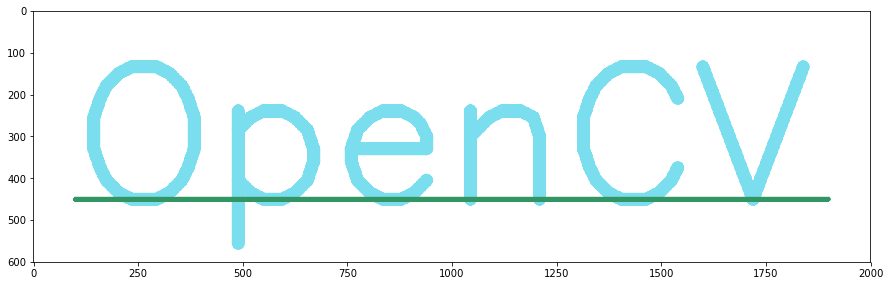

In [56]:
# Blank Canvas
img = 255 * np.ones((600, 2000, 3), dtype=np.uint8)

# Draw Text
img = cv2.putText(img, text='OpenCV', org=(100,450), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=15, 
                  color=(238,222,123), thickness=30, lineType=cv2.LINE_AA)
img = cv2.line(img, (100, 450), (1900, 450), (100, 150, 50), 10, cv2.LINE_AA)

img = img[:, :, ::-1]
plt.figure(figsize=(15,5))
plt.imshow(img, cmap='gray')
plt.show()

## 5. Region of Image (ROI)

- 直接使用 Index Slicing 进行切图


- 注意矩阵的第一维其实才是图片的高度，第二维才是图片的宽度

In [60]:
img.shape

(600, 2000, 3)

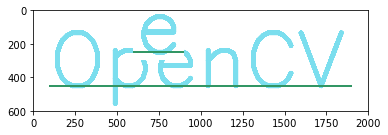

In [59]:
e = img[200:500, 700:1000]
img[0:300, 600:900] = e
plt.imshow(img, cmap='gray')
plt.show()

## 6. Add Padding

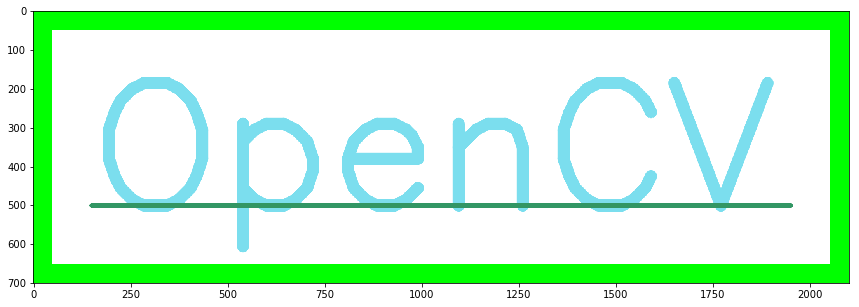

In [55]:
constant_padding = cv2.copyMakeBorder(img, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0, 255, 0])
plt.figure(figsize=(15,5))
plt.imshow(constant_padding, cmap='gray')
plt.show()

## 7. 使用滤波器对图像进行卷积运算

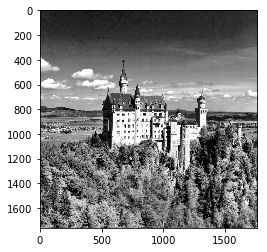

(1760, 1760)

In [16]:
import tensorflow as tf
import tf.nn.conv2d
img = cv2.imread('view.jpg')
img = img[:, :, ::-1]
img = img[:, :, 0]
input = tf.Variable()
kernel = np.array([[0, 255, 0], [0, 255, 0], [0, 255, 0]])
result = convolve2d(img, kernel)
plt.imshow(result, cmap='gray')
plt.show()
result.shape

## 8. 使用 ColorMap 对图像进行着色

实际工作中，我们通常不仅展示图片，还要在图片上进一步标记一些相关数据。例如对于一幅地图来说，我们不仅希望展示这个地图本身的样子，还想要标记地图对应的这片区域的气候温度分布是什么样的，这就涉及到了用 ColorMap 对图像进行着色的工作了。

### 8.1 ColorMap 映射原理

- 本质上任何彩色图像的呈现效果都依赖于你选择的ColorMap，也就是你的**像素数值（0-255）与对应颜色深度的映射关系**。

- 最默认的方法，是使用灰阶，即图像所有像素数值都显示为同一种颜色，只不过呈现的颜色深浅不同，然后把不同颜色的图像叠加显示，就是标准的彩色图像。

- 例如 `JET` 这种常用的映射逻辑就定义像素数值越接近0，颜色越偏蓝（冷），越接近255，颜色越偏红（热），中间的过渡值（128）则呈现为三原色中剩下的绿色。


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


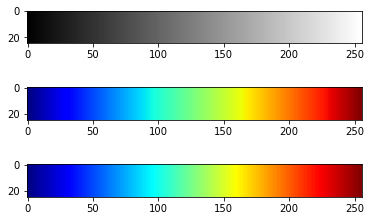

In [36]:
img = np.array([list(range(256))] * 25, dtype=np.uint8)
print(img[0, :20])
plt.subplot(3, 1, 1)
plt.imshow(img, cmap='gray')
plt.subplot(3, 1, 2)
plt.imshow(img, cmap='jet')
plt.subplot(3, 1, 3)
img_jet = cv2.applyColorMap(img, cv2.COLORMAP_JET)
img_jet = img_jet[:, :, ::-1]
plt.imshow(img_jet)
plt.show()

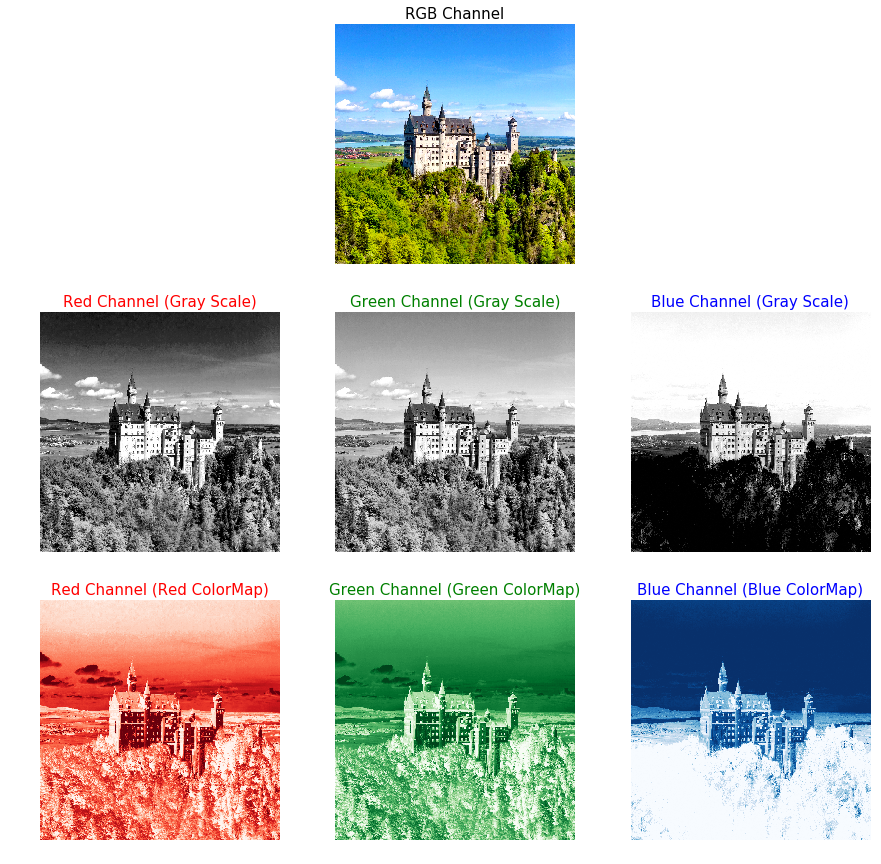

In [53]:
img = cv2.imread('view.jpg')
img = img[:, :, ::-1]
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 2)
plt.imshow(img, cmap='gray')
plt.title('RGB Channel', size='15')
plt.axis('off')
plt.subplot(3, 3, 4)
plt.imshow(img[:, :, 0], cmap='gray')
plt.title('Red Channel (Gray Scale)', color='r', size='15')
plt.axis('off')
plt.subplot(3, 3, 5)
plt.imshow(img[:, :, 1], cmap='gray')
plt.title('Green Channel (Gray Scale)', color='g', size='15')
plt.axis('off')
plt.subplot(3, 3, 6)
plt.imshow(img[:, :, 2], cmap='gray')
plt.title('Blue Channel (Gray Scale)', color='b', size='15')
plt.axis('off')
plt.subplot(3, 3, 7)
plt.imshow(img[:, :, 0], cmap='Reds')
plt.title('Red Channel (Red ColorMap)', color='r', size='15')
plt.axis('off')
plt.subplot(3, 3, 8)
plt.imshow(img[:, :, 1], cmap='Greens')
plt.title('Green Channel (Green ColorMap)', color='g', size='15')
plt.axis('off')
plt.subplot(3, 3, 9)
plt.imshow(img[:, :, 2], cmap='Blues')
plt.title('Blue Channel (Blue ColorMap)', color='b', size='15')
plt.axis('off')
plt.show()

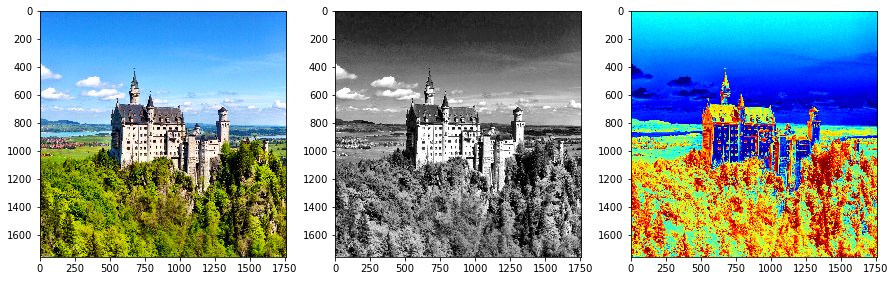

In [13]:
img = cv2.imread('view.jpg')
img = img[:, :, ::-1]
img_gray = img[:, :, 0]
img_jet = cv2.applyColorMap(img, cv2.COLORMAP_JET)
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img_jet)
plt.show()

### 用Seaborn实现同样的功能